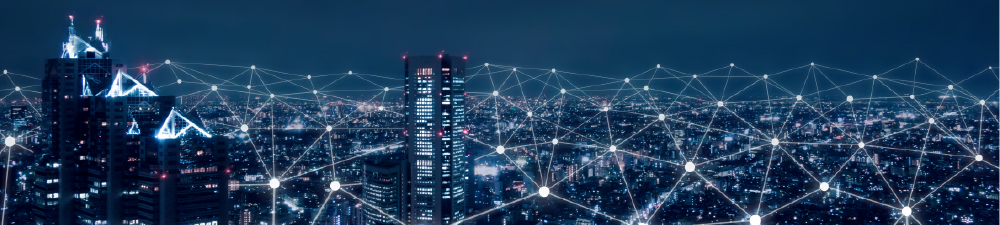

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [235]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [236]:
#edit the file location of raw data set

#cust_df=pd.read_csv("C:/Users/choudhary abhishek/Desktop/8. RISE/Telco Churn Data Set.csv")

#Read data & preview
data=pd.read_csv('Mini_project_3_Data.xls')
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [237]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
#cust_df.shape

print(list(data.columns))

print("\nRow | Colums of the dataframe are :")
data.shape

data.dtypes

#check if there is duplicate
data.duplicated()
print('How many duplicated row if any :', data.duplicated().sum())


['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam', 'C

(51047, 58)

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

0        False
1        False
2        False
3        False
4        False
         ...  
51042    False
51043    False
51044    False
51045    False
51046    False
Length: 51047, dtype: bool

How many duplicated row if any : 0


In [238]:
#this code prints frequency table for a list of categorical columns
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())

cat_cols = ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 
            'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings' , 'NonUSTravel', 
            'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber',
            'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
            'CreditRating', 'PrizmCode', 'Occupation','MaritalStatus']
count_unique(data, cat_cols)


For column Churn
No     36336
Yes    14711
Name: Churn, dtype: int64

For column ServiceArea
NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
VAHSTA540       1
SEALEW208       1
SEADAL503       1
MILLKM920       1
NMXLSA505       1
Name: ServiceArea, Length: 747, dtype: int64

For column ChildrenInHH
No     38679
Yes    12368
Name: ChildrenInHH, dtype: int64

For column HandsetRefurbished
No     43956
Yes     7091
Name: HandsetRefurbished, dtype: int64

For column HandsetWebCapable
Yes    46046
No      5001
Name: HandsetWebCapable, dtype: int64

For column TruckOwner
No     41524
Yes     9523
Name: TruckOwner, dtype: int64

For column RVOwner
No     46894
Yes     4153
Name: RVOwner, dtype: int64

For column Homeownership
Known      33987
Unknown    17060
Name: Homeownership, dtype: int64

For column BuysViaMailOrder
No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64

For column RespondsToMailOffers
No     31821
Yes

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [239]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

print('Number of customer with zero monthly revenue is :')

#count customer with zero monthly revenue
data0=data.MonthlyRevenue[data.MonthlyRevenue==0].count()
data0

#Exclude zero monthly revenue customers
data=data[data['MonthlyRevenue'] !=0]
data.head()

print("Row | Colums of the dataframe without zero monthly revenue are :")
data.shape


Number of customer with zero monthly revenue is :


6

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


Row | Colums of the dataframe without zero monthly revenue are :


(51041, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [240]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

#columns & their missing values
data.isna().sum() / len(data) *100


CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305637
MonthlyMinutes               0.305637
TotalRecurringCharge         0.305637
DirectorAssistedCalls        0.305637
OverageMinutes               0.305637
RoamingCalls                 0.305637
PercChangeMinutes            0.715111
PercChangeRevenues           0.715111
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [241]:
#count columns
mv5 = data.isna().sum() / len(data) > 5.0
sum_mv5 = mv5.sum() 
print ('Based on the list above, the column that have missing values percentage > 5% is', sum_mv5, '.')

Based on the list above, the column that have missing values percentage > 5% is 0 .


<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)

I would suggest to use mean or mode to impute the missing values, for example using mean as below for column 'MonthlyRevenue'.
    
missing_col = ['MonthlyRevenue']
    
for i in missing_col:
    
    data1.loc[data1.loc[:,i].isnull(),i]=data1.loc[:,i].mean()

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

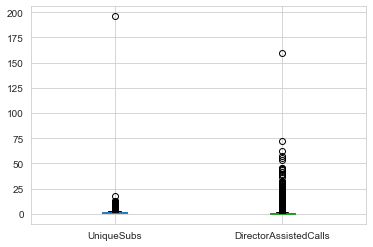

In [242]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
#cols=["UniqueSubs","DirectorAssistedCalls"]
#cust_df.boxplot(column=cols)

cols=["UniqueSubs","DirectorAssistedCalls"]
data.boxplot(column=cols)

In [243]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

print('The top 1% outliers from UniqueSubs & DirectorAssistedCalls are: ')
print('UniqueSub : ', data['UniqueSubs'].quantile(0.99), 'and above.')
print('DirectorAssistedCalls : ', data['DirectorAssistedCalls'].quantile(0.99),'and above.')


The top 1% outliers from UniqueSubs & DirectorAssistedCalls are: 
UniqueSub :  5.0 and above.
DirectorAssistedCalls :  9.65 and above.


,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,196.0,159.39


<AxesSubplot:>

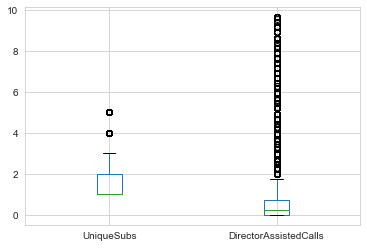

In [203]:
#use quantile to find top 1%
quantile_numbers=[i/100 for i in range(95,101,1)]
data[cols].quantile(quantile_numbers)

#removing the outliers
dataQ = data[(data['UniqueSubs'] <=5.0) & (data['DirectorAssistedCalls'] <=9.65)]
cols=["UniqueSubs","DirectorAssistedCalls"]
dataQ.boxplot(column=cols)


In [244]:
#Removing outliers for EDA
#The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles.
#It is represented by the formula IQR = Q3 − Q1. 
#https://www.codegrepper.com/code-examples/python/remove+outlier+columns+pandas
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print('The interquartile range (IQR) for the columns are :')
print(IQR)

data2 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print()
print('Columns | Rows')
data2.shape


The interquartile range (IQR) for the columns are :
CustomerID                   204720.00
MonthlyRevenue                   37.46
MonthlyMinutes                  565.00
TotalRecurringCharge             30.00
DirectorAssistedCalls             0.99
OverageMinutes                   41.00
RoamingCalls                      0.30
PercChangeMinutes               149.00
PercChangeRevenues                8.70
DroppedCalls                      7.00
BlockedCalls                      3.70
UnansweredCalls                  31.00
CustomerCareCalls                 1.70
ThreewayCalls                     0.30
ReceivedCalls                   145.20
OutboundCalls                    30.70
InboundCalls                      9.30
PeakCallsInOut                   98.30
OffPeakCallsInOut                77.70
DroppedBlockedCalls              10.60
CallForwardingCalls               0.00
CallWaitingCalls                  1.30
MonthsInService                  13.00
UniqueSubs                        1.00
ActiveSubs  

(16975, 58)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

In [ ]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
#sns.scatterplot(x = '', y = '', data = )


<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

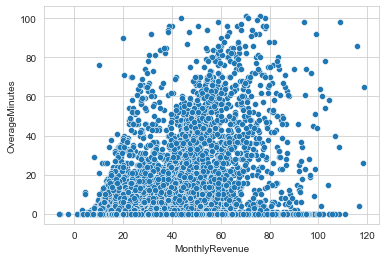

In [245]:
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = data2)
#extra info in the plot with code below
#sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = data2, hue='IncomeGroup', style='Occupation')

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

The plot shows there is positive correlation between customers with high overage minutes and high revenue, though most customers fall into 60 monthly revenue and below.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

In [ ]:
#use category plot to plot monthly revenue for each active subs category
#sns.catplot() 


In [ ]:
sns.catplot(y = 'MonthlyRevenue', x = 'ActiveSubs' , data = data)

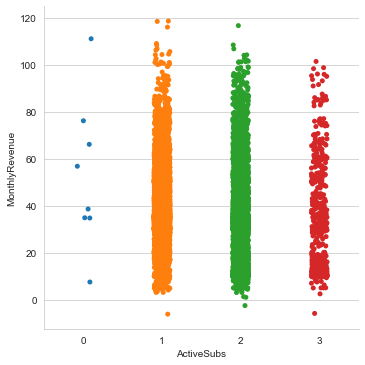

In [246]:
sns.catplot(y = 'MonthlyRevenue', x = 'ActiveSubs' , data = data2)

In [ ]:
sns.barplot(y = 'MonthlyRevenue', x = 'ActiveSubs' , data = data) 

<AxesSubplot:xlabel='ActiveSubs', ylabel='MonthlyRevenue'>

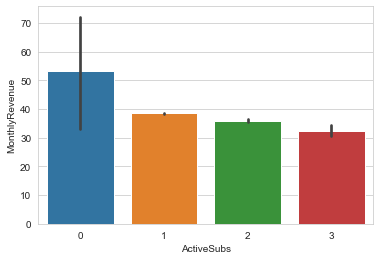

In [247]:
sns.barplot(y = 'MonthlyRevenue', x = 'ActiveSubs' , data = data2) 

In [ ]:
sns.scatterplot(y = 'MonthlyRevenue', x = 'ActiveSubs', data = data)

<AxesSubplot:xlabel='ActiveSubs', ylabel='MonthlyRevenue'>

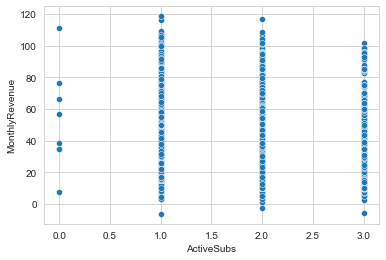

In [248]:
sns.scatterplot(y = 'MonthlyRevenue', x = 'ActiveSubs', data = data2)

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
    
Yes, with reference to the plots above, there is negative correlation or opposite trend that with higher number of subscribers, the monthly revenue is trending down.   

### Q2.3 Does credit rating have an impact in churn rate?

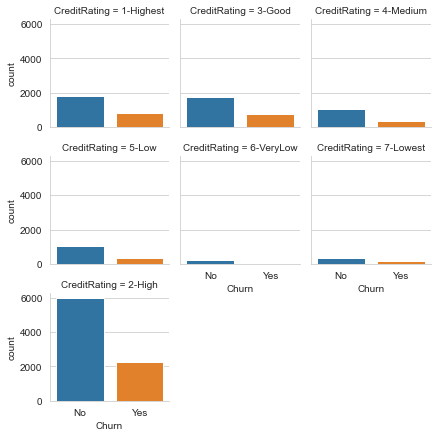

data2 - Churn


No     12171
Yes     4804
Name: Churn, dtype: int64

data2 - CreditRating


2-High       8248
1-Highest    2640
3-Good       2485
5-Low        1407
4-Medium     1402
7-Lowest      518
6-VeryLow     275
Name: CreditRating, dtype: int64

- Churn & CreditRating columns after encoded with ordinal encoding -

data2 - Churn


1    12171
2     4804
Name: Churn, dtype: int64

data2 - CreditRating


7    8248
1    2640
2    2485
4    1407
3    1402
6     518
5     275
Name: CreditRating, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='CreditRating'>

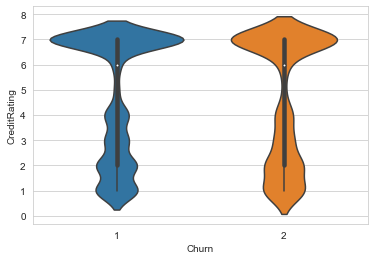

In [249]:
#plot to show relation
sns.catplot(x="Churn", col="CreditRating", col_wrap=3,kind="count",
            height=2, aspect=1, data=data2[data2.CreditRating.notnull()])
plt.show()


#checking breakdown of values under 'Churn' and 'CreditRating' columns 
print('data2 - Churn')
data2['Churn'].value_counts()
print('data2 - CreditRating')
data2['CreditRating'].value_counts()

# I learned to use encode categorical variables with ordinal encoding #20210722 class
try:
    import category_encoders as ce
except:
    !pip install category_encoders
    import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['CreditRating','Churn'])


# fit and transform using fit_transform on the encoder object using data2
# reassign it back to data2
data2 = encoder.fit_transform(data2)

#checking breakdown of values under 'Churn' and 'CreditRating' columns after encoded with ordinal encoding
print('- Churn & CreditRating columns after encoded with ordinal encoding -')
print('\ndata2 - Churn')
data2['Churn'].value_counts()
print('data2 - CreditRating')
data2['CreditRating'].value_counts()

#plot bar to show relation
sns.violinplot(y = 'CreditRating', x = 'Churn' , data=data2)
plt.show()


<mark>__Result:__
    
Type your interpretation here based on the analysis above
    
With reference to plots above, high credit rating does have subtle positive correlation with churn rate, compare to low credit rating.     

### Placeholder for additional exploratory analysis

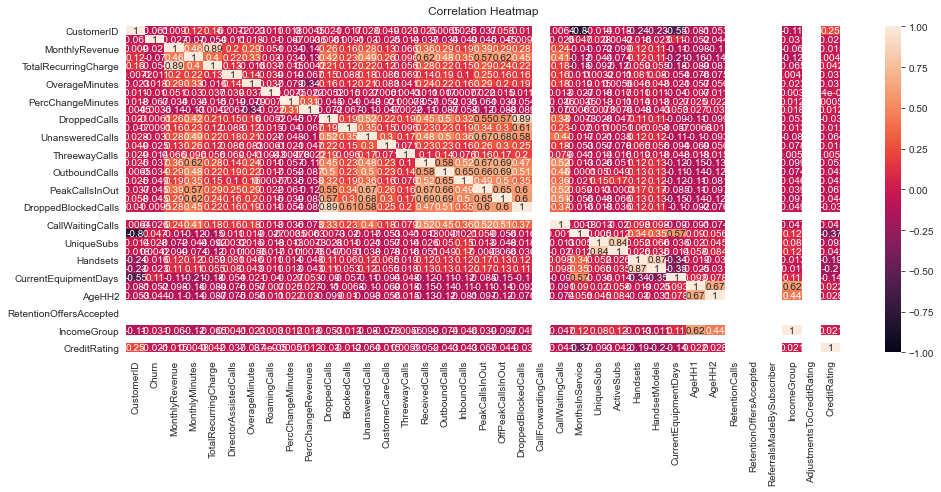

In [185]:
#plot correlation heatmap 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
"""
For Heatmap above
Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other')
A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases')
The diagonals are all 1 because those squares are correlating each variable to itself so it is a perfect correlation.)
For the rest the larger the number & darker the color the higher the correlation between the two variables'
"""

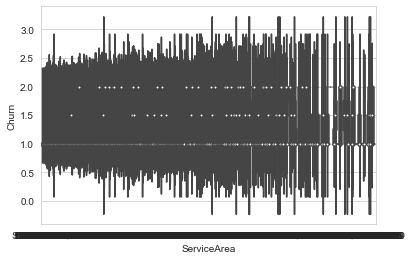

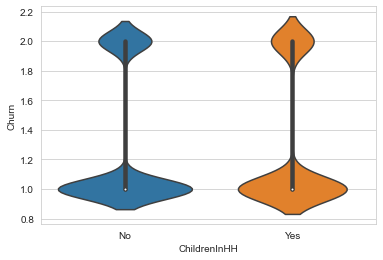

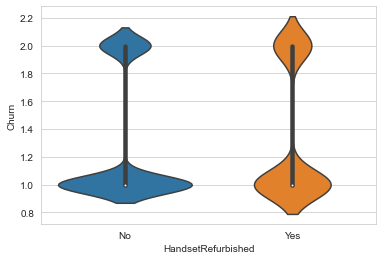

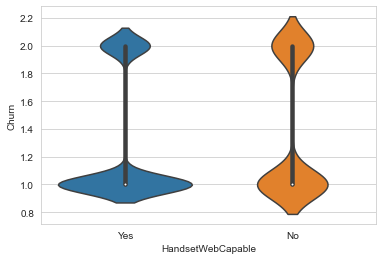

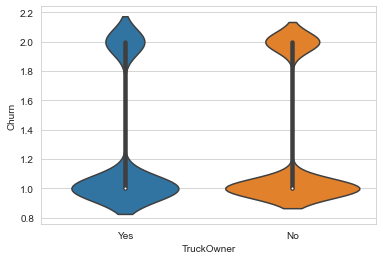

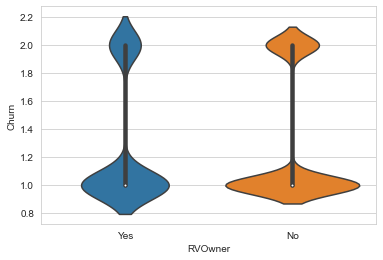

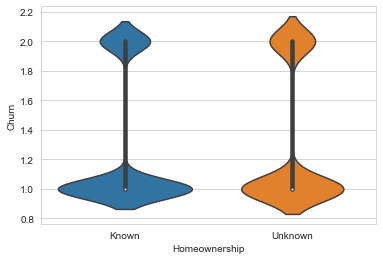

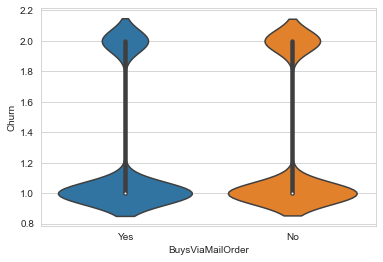

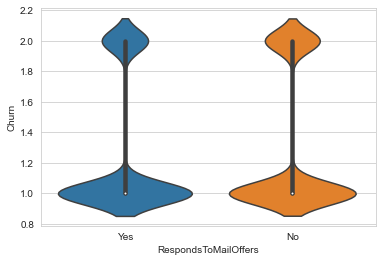

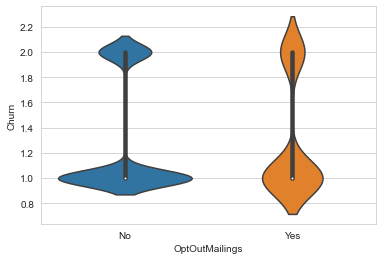

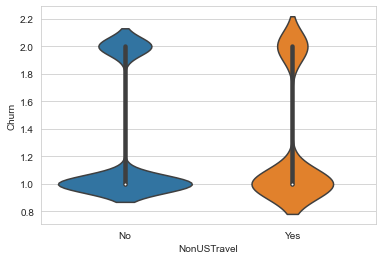

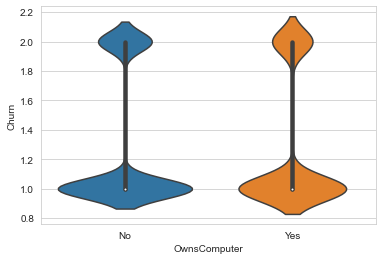

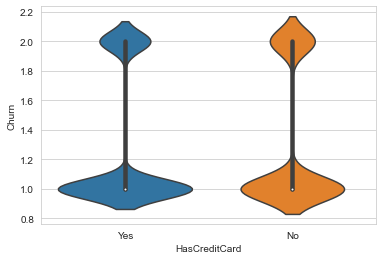

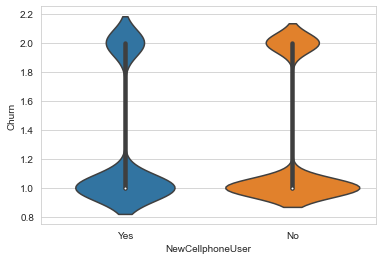

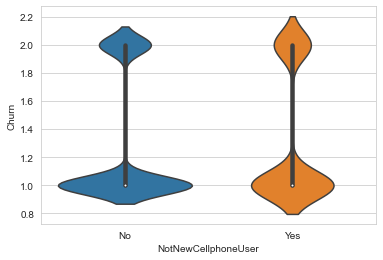

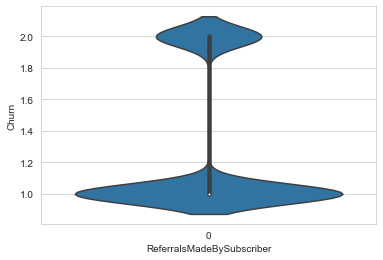

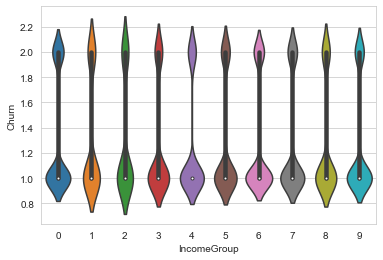

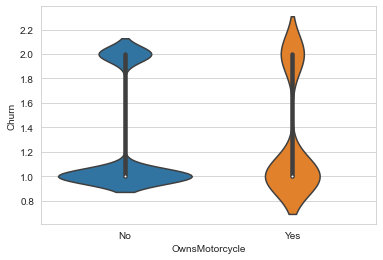

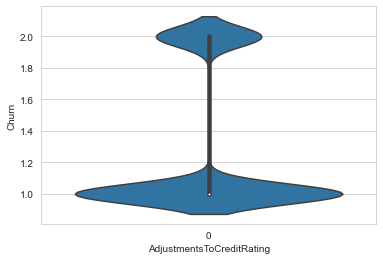

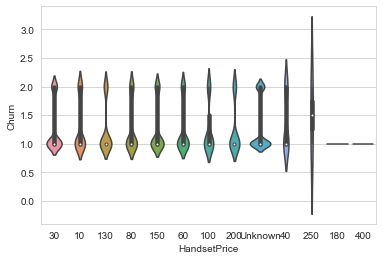

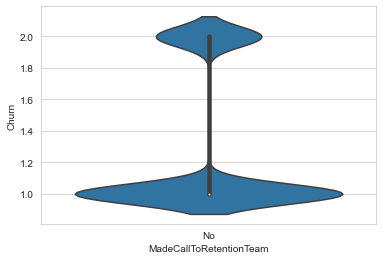

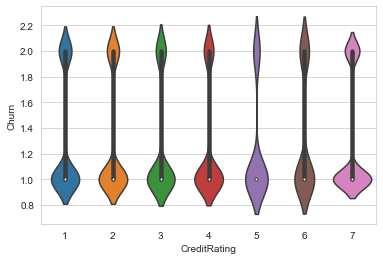

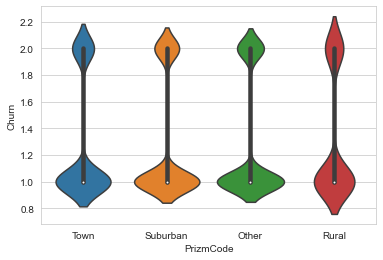

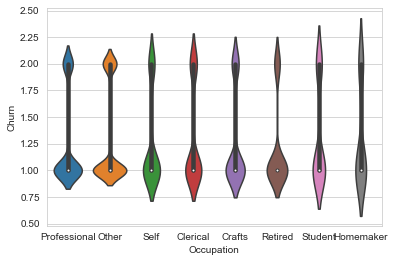

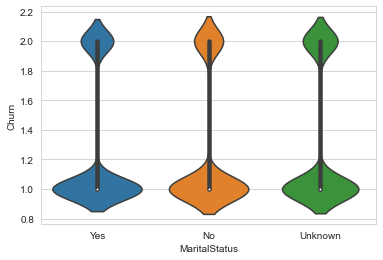

In [186]:
#just trying for additional exploratory analysis
def plot_violin(data2, cols, col_y = 'Churn'):
    for col in cols:
        sns.set_style("whitegrid")
        # add argument x=col, y=col_y
        sns.violinplot(x=col, y=col_y, data=data2)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
 
cat_cols = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 
            'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings' , 'NonUSTravel', 
            'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber',
            'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
            'CreditRating', 'PrizmCode', 'Occupation','MaritalStatus']

plot_violin(data2, cat_cols)  

## Q3. Create additional features to help predict churn

In [250]:
#wrapper function to create additional features for churn prediction
#def create_features(cust_df):
def create_features(data2):

    #3.1 Percent of current active subs over total subs
    #cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    data2['perc_active_subs'] = data2['ActiveSubs'] / data2['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    data2['perc_recurrent_charge']= data2['MonthlyRevenue'] / data2['TotalRecurringCharge']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    data2['perc_overage_mins'] = data2['OverageMinutes'] / data2['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    #return cust_df  
    return data2

print ('Ran')


Ran


In [251]:
#Make a call to the feature engineering wrapper function for churn prediction
#cust_df=create_features(cust_df)

data2=create_features(data2)
#data=create_features(data)

#to check if create_features columns are created
data2.head()


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins
621,3004926,1,30.27,108.0,30.0,0.00,0.0,0.0,-49.0,-0.3,...,0,30,No,1,Town,Professional,Yes,1.0,1.009000,0.0
633,3005038,2,35.51,15.0,35.0,0.25,0.0,0.0,-4.0,-0.6,...,0,30,No,1,Suburban,Professional,Yes,1.0,1.014571,0.0
660,3005250,2,32.78,195.0,30.0,1.49,0.0,0.0,-60.0,-1.8,...,0,10,No,2,Suburban,Other,Yes,1.0,1.092667,0.0
665,3005298,1,33.76,167.0,40.0,0.25,0.0,0.0,-52.0,-0.5,...,0,30,No,1,Suburban,Other,Yes,1.0,0.844000,0.0
698,3005522,1,30.52,78.0,30.0,0.25,0.0,0.0,20.0,-0.5,...,0,30,No,1,Other,Other,No,1.0,1.017333,0.0


In [252]:
print('List of columns before drop :')
print(list(data2.columns))
print()


data2=data2.drop(['CustomerID', 'DirectorAssistedCalls', 'RoamingCalls', 'DroppedCalls', 'BlockedCalls',
                  'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
                  'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                  'CallForwardingCalls', 'CallWaitingCalls', 'ServiceArea', 'Handsets', 'HandsetModels',
                  'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 
                  'RVOwner', 'Homeownership', 'BuysViaMailOrder',
                  'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
                  'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 
                  'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'CreditRating', 'PrizmCode',
                  'MaritalStatus'], axis = 1)

print('List of columns after dropped :')
print(list(data2.columns))

List of columns before drop :
['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',

In [253]:

#to check if there is null value
data2.isna().sum()

#to drop null values in dataframe
#data2 = data2.dropna()

#impute null values with mode & mean
for column in data2:
    if data2[column].isnull().any():
        if(column in data2):
            data2[column].fillna(data2[column].mode()[0])
        else:
            data2[column].fillna(data2[column].mean)
print ('Ran')

#to check if there is null value after dropped null values
data2.isna().sum()

Churn                          0
MonthlyRevenue                81
MonthlyMinutes                81
TotalRecurringCharge          81
OverageMinutes                81
PercChangeMinutes            135
PercChangeRevenues           135
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
CurrentEquipmentDays           1
ReferralsMadeBySubscriber      0
IncomeGroup                    0
MadeCallToRetentionTeam        0
Occupation                     0
perc_active_subs               0
perc_recurrent_charge         81
perc_overage_mins            537
dtype: int64

621      30.27
633      35.51
660      32.78
665      33.76
698      30.52
         ...  
51033    38.34
51037    31.92
51039    50.00
51042    29.99
51045    29.99
Name: MonthlyRevenue, Length: 16975, dtype: float64

621      108.0
633       15.0
660      195.0
665      167.0
698       78.0
         ...  
51033    320.0
51037     63.0
51039    492.0
51042      0.0
51045      0.0
Name: MonthlyMinutes, Length: 16975, dtype: float64

621      30.0
633      35.0
660      30.0
665      40.0
698      30.0
         ... 
51033    30.0
51037    17.0
51039    50.0
51042    30.0
51045    30.0
Name: TotalRecurringCharge, Length: 16975, dtype: float64

621       0.0
633       0.0
660       0.0
665       0.0
698       0.0
         ... 
51033    21.0
51037    43.0
51039     0.0
51042     0.0
51045     0.0
Name: OverageMinutes, Length: 16975, dtype: float64

621     -49.0
633      -4.0
660     -60.0
665     -52.0
698      20.0
         ... 
51033   -66.0
51037   -38.0
51039     0.0
51042     0.0
51045     0.0
Name: PercChangeMinutes, Length: 16975, dtype: float64

621      -0.3
633      -0.6
660      -1.8
665      -0.5
698      -0.5
         ... 
51033    -8.3
51037   -13.2
51039     0.0
51042     0.0
51045     0.0
Name: PercChangeRevenues, Length: 16975, dtype: float64

621      555.0
633      669.0
660      586.0
665      575.0
698      203.0
         ...  
51033    945.0
51037    883.0
51039    882.0
51042    526.0
51045    433.0
Name: CurrentEquipmentDays, Length: 16975, dtype: float64

621      1.009000
633      1.014571
660      1.092667
665      0.844000
698      1.017333
           ...   
51033    1.278000
51037    1.877647
51039    1.000000
51042    1.000000
51045    1.000000
Name: perc_recurrent_charge, Length: 16975, dtype: float64

621      0.000000
633      0.000000
660      0.000000
665      0.000000
698      0.000000
           ...   
51033    0.065625
51037    0.682540
51039    0.000000
51042    0.000000
51045    0.000000
Name: perc_overage_mins, Length: 16975, dtype: float64

Ran


Churn                          0
MonthlyRevenue                81
MonthlyMinutes                81
TotalRecurringCharge          81
OverageMinutes                81
PercChangeMinutes            135
PercChangeRevenues           135
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
CurrentEquipmentDays           1
ReferralsMadeBySubscriber      0
IncomeGroup                    0
MadeCallToRetentionTeam        0
Occupation                     0
perc_active_subs               0
perc_recurrent_charge         81
perc_overage_mins            537
dtype: int64

In [254]:
data2.dtypes

Churn                          int64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
OverageMinutes               float64
PercChangeMinutes            float64
PercChangeRevenues           float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
CurrentEquipmentDays         float64
ReferralsMadeBySubscriber      int64
IncomeGroup                    int64
MadeCallToRetentionTeam       object
Occupation                    object
perc_active_subs             float64
perc_recurrent_charge        float64
perc_overage_mins            float64
dtype: object

In [255]:
#this code prints frequency table for list of columns
def count_unique(data2, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data2[col].value_counts())

cat_cols = ['Churn', 'MadeCallToRetentionTeam', 'Occupation']
count_unique(data2, cat_cols)


For column Churn
1    12171
2     4804
Name: Churn, dtype: int64

For column MadeCallToRetentionTeam
No    16975
Name: MadeCallToRetentionTeam, dtype: int64

For column Occupation
Other           11795
Professional     3499
Crafts            519
Clerical          354
Retired           353
Self              287
Student           119
Homemaker          49
Name: Occupation, dtype: int64


In [256]:
# I learned to use encode categorical variables with ordinal encoding
try:
    import category_encoders as ce
except:
    !pip install category_encoders
    import category_encoders as ce

#encoder = ce.OrdinalEncoder(cols=['CreditRating','Churn'])

encoder = ce.OrdinalEncoder(cols = ['Churn', 'MadeCallToRetentionTeam', 'Occupation'])

# fit and transform using fit_transform on the encoder object using data2
# reassign it back to data2
data2 = encoder.fit_transform(data2)

print('Ran')

Ran


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [232]:
#Clear NaN from perc_overage_minutes
#data2['perc_overage_mins'] = data2['perc_overage_mins'].fillna(0)

In [257]:

data2 = pd.get_dummies(data2) 
#The get_dummies method of the pandas library converts categorical columns to numeric columns. 

#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

#Abh advice
data2.replace([np.inf, -np.inf], np.nan, inplace=True)
data2.dropna()

#Clear NaN from perc_overage_minutes
data2['perc_overage_mins'] = data2['perc_overage_mins'].fillna(0)

X = data2.drop(['Churn'], axis=1)
#X.dropna()

y = data2['Churn'] #Target variable
#y.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)

                   

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,PercChangeMinutes,PercChangeRevenues,MonthsInService,UniqueSubs,ActiveSubs,CurrentEquipmentDays,ReferralsMadeBySubscriber,IncomeGroup,MadeCallToRetentionTeam,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
621,1,30.27,108.0,30.0,0.0,-49.0,-0.3,43,1,1,555.0,0,6,1,1,1.0,1.009000,0.000000
633,2,35.51,15.0,35.0,0.0,-4.0,-0.6,43,1,1,669.0,0,9,1,1,1.0,1.014571,0.000000
660,2,32.78,195.0,30.0,0.0,-60.0,-1.8,43,2,2,586.0,0,7,1,2,1.0,1.092667,0.000000
665,1,33.76,167.0,40.0,0.0,-52.0,-0.5,43,1,1,575.0,0,7,1,2,1.0,0.844000,0.000000
698,1,30.52,78.0,30.0,0.0,20.0,-0.5,43,1,1,203.0,0,7,1,2,1.0,1.017333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51029,2,30.24,63.0,30.0,0.0,13.0,0.7,32,1,1,946.0,0,5,1,2,1.0,1.008000,0.000000
51031,2,33.63,28.0,30.0,0.0,0.0,0.0,33,2,1,315.0,0,0,1,2,0.5,1.121000,0.000000
51033,2,38.34,320.0,30.0,21.0,-66.0,-8.3,35,2,2,945.0,0,6,1,1,1.0,1.278000,0.065625
51037,1,31.92,63.0,17.0,43.0,-38.0,-13.2,30,1,1,883.0,0,3,1,2,1.0,1.877647,0.682540


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set

#fit logistic regression to the training set 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, y_train)


In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model

y_pred = classifier.predict(X_test)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
print('With the default threshold 0.5, the values less than 0.5 are assigned to class 0 as churners')
print('And values greater than or equal to to 0.5 are assigned to 1 as non churners')
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
    
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

# make the confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)



In [ ]:

#calculate the accuracy score
# Accuracy = number of times you're right / number of predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

#import RandomFroest classifier
from sklearn.ensemble import RandomForestClassifier

#initiate the classifier
rfc = RandomForestClassifier(random_state=0)

#fit the model
rfc.fit(X_train, y_train)

#predict the test set results
y_pred = rfc.predict(X_test)

#check accuracy score
from sklearn.metrics import accuracy_score

print('Model acuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))



In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model

#predict the test set results
y_pred = rfc.predict(X_test)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

print ('With default threshold of 0.5, values less than 0.5 are assigned to class 0 as churners.')
print ('And values greater than or equal to 0.5 are assigned to class 1 as non churners.')      

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

# make the confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)



<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

I would say logistic regression model.

### Q4.3 Identify most important features impacting churn

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

pd.Series(model.feature_importances_, index=X_train.columns)

#creates a bar plot of the top 10 features for predicting customer churn:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')


## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [107]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object

dataH=pd.read_csv('Mini_project_3_Hold_Out_Data.xls')
dataH.head()

def create_features(dataH):

    #3.1 Percent of current active subs over total subs
    #cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    dataH['perc_active_subs'] = dataH['ActiveSubs'] / dataH['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    dataH['perc_recurrent_charge']= dataH['MonthlyRevenue'] / dataH['TotalRecurringCharge']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    dataH['perc_overage_mins'] = dataH['OverageMinutes'] / dataH['MonthlyMinutes']
    
    #return cust_df  
    return dataH

dataH=create_features(dataH)


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [108]:
dataH=dataH.drop(['CustomerID', 'DirectorAssistedCalls', 'RoamingCalls', 'DroppedCalls', 'BlockedCalls',
                  'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
                  'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                  'CallForwardingCalls', 'CallWaitingCalls', 'ServiceArea', 'Handsets', 'HandsetModels',
                  'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 
                  'RVOwner', 'Homeownership', 'BuysViaMailOrder',
                  'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard','RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 
                  'AdjustmentsToCreditRating', 'HandsetPrice', 'CreditRating', 'PrizmCode','MaritalStatus'], axis = 1)
print ('Ran')

Ran


In [109]:
for column in dataH:
    if dataH[column].isnull().any():
        if(column in dataH):
            dataH[column]=dataH[column].fillna(dataH[column].mode)
        else:
            dataH[column]=dataH[column].fillna(dataH[column].mean)
            
print('Ran')

Ran


In [ ]:
dataH = pd.get_dummies(dataH)

from sklearn.model_selection import train_test_split

dataH.replace([np.inf, -np.inf], np.nan, inplace=True)
dataH.dropna()

X = dataH.drop(['Churn'], axis=1)

y = dataH['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   